In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
#dataset read and dropping unwanted parameters as these parameters have been cleaned and saved in new variables
dataset = pd.read_csv('green_clean_2018.csv')
X = dataset.drop(columns=['PUT','DOT','lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PUD', 'DOD', 'PULocationID'],axis=1)
y = dataset['PULocationID']
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [7]:
#using train_test_split from sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285229 entries, 714014 to 773630
Data columns (total 18 columns):
VendorID                 1285229 non-null float64
dispatch                 1285229 non-null int64
RatecodeID               1285229 non-null float64
DOLocationID             1285229 non-null float64
passenger_count          1285229 non-null float64
trip_distance            1285229 non-null float64
fare_amount              1285229 non-null float64
extra                    1285229 non-null float64
mta_tax                  1285229 non-null float64
tip_amount               1285229 non-null float64
tolls_amount             1285229 non-null float64
improvement_surcharge    1285229 non-null float64
total_amount             1285229 non-null float64
payment_type             1285229 non-null float64
trip_type                1285229 non-null float64
day                      1285229 non-null int64
month                    1285229 non-null int64
PickUp_hr                1285229 non-nu

In [9]:
#using xgbregressor from xgboost
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = 0.01,
                max_depth = 4, alpha = 10, n_estimators = 1)

In [10]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.01, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=1, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [11]:
preds = xg_reg.predict(X_test)

In [12]:
#Calculating the rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 131.508072


In [13]:
#setting the parameters
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.01,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [14]:
#printing the last rmse result
print((cv_results["test-rmse-mean"]).tail(1))

49    98.736566
Name: test-rmse-mean, dtype: float64


In [15]:
print(cv_results)

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0        131.588211        0.020926      131.532018       0.184553
1        130.595876        0.036729      130.625081       0.188275
2        129.680261        0.027005      129.726323       0.197608
3        128.879809        0.031792      128.832860       0.202862
4        127.993071        0.043594      127.955857       0.188950
5        127.093433        0.057810      127.088588       0.191533
6        126.169658        0.065985      126.228045       0.194774
7        125.385625        0.076854      125.388147       0.186812
8        124.557413        0.073370      124.562161       0.184342
9        123.656583        0.061700      123.744897       0.184639
10       122.890488        0.071503      122.938697       0.188182
11       122.104007        0.099294      122.138959       0.197320
12       121.297353        0.098518      121.358345       0.199546
13       120.472067        0.091076      120.579578       0.19

In [16]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

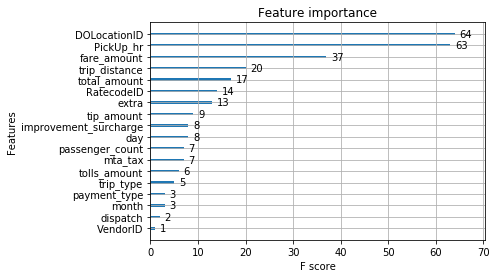

In [17]:
#Plotting the feature importance
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606537 entries, 0 to 1606536
Data columns (total 18 columns):
VendorID                 1606537 non-null float64
dispatch                 1606537 non-null int64
RatecodeID               1606537 non-null float64
DOLocationID             1606537 non-null float64
passenger_count          1606537 non-null float64
trip_distance            1606537 non-null float64
fare_amount              1606537 non-null float64
extra                    1606537 non-null float64
mta_tax                  1606537 non-null float64
tip_amount               1606537 non-null float64
tolls_amount             1606537 non-null float64
improvement_surcharge    1606537 non-null float64
total_amount             1606537 non-null float64
payment_type             1606537 non-null float64
trip_type                1606537 non-null float64
day                      1606537 non-null int64
month                    1606537 non-null int64
PickUp_hr                1606537 non-null i

In [21]:
#Using different features and using similar approach as above with different parameters and finding their respective parameters
X = dataset.drop(columns=['dispatch', 'day','trip_type', 'VendorID','improvement_surcharge','payment_type','mta_tax',
                         'RatecodeID','tolls_amount','month', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PUD', 'DOD','PUT','DOT', 'PULocationID'],axis=1)
y = dataset['PULocationID']
data_dmatrix = xgb.DMatrix(data=X,label=y)

C:\Users\Arbaz\Anaconda3\envs\ensc-s2019\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Arbaz\Anaconda3\envs\ensc-s2019\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [23]:
#Same parameters are used
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [24]:
#RMSE is calculated
printscikit ref((cv_results["test-rmse-mean"]).tail(1))

49    98.841142
Name: test-rmse-mean, dtype: float64


In [26]:
#different parameters are dropped again
X = dataset.drop(columns=['VendorID','RatecodeID','mta_tax','tolls_amount','improvement_surcharge','total_amount','payment_type','trip_type','dispatch','PickUp_hr', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PUD', 'DOD','PUT','DOT', 'PULocationID'],axis=1)

In [27]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [29]:
#same parameters
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.01,
                'max_depth': 5, 'alpha': 10}

In [30]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [31]:
#RMSE value
print((cv_results["test-rmse-mean"]).tail(1))

49    98.933505
Name: test-rmse-mean, dtype: float64


In [32]:
print(cv_results)

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0        131.588324        0.020967      131.537344       0.184585
1        130.614986        0.026856      130.631504       0.180237
2        129.683192        0.026219      129.738391       0.178473
3        128.913425        0.067468      128.843359       0.174634
4        128.029115        0.054815      127.987617       0.174268
5        127.137859        0.058125      127.135191       0.175088
6        126.233077        0.047736      126.291122       0.177124
7        125.453971        0.061291      125.450642       0.175068
8        124.609457        0.045148      124.627161       0.175569
9        123.717916        0.043539      123.817996       0.182287
10       122.965267        0.060784      123.005999       0.193731
11       122.188388        0.064027      122.206957       0.193061
12       121.366639        0.058682      121.434577       0.192482
13       120.542577        0.049981      120.659271       0.19